<a href="https://colab.research.google.com/github/felipequinto/Projeto_Data_Mining_PUC-RIO/blob/main/Projeto_DM_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leitura da base

In [ ]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import sklearn
import copy

import warnings
warnings.filterwarnings('ignore')

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [ ]:
# Carregando a base
horse_data = pd.read_csv('horse.csv')
horse_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
# Verificando o tamanho da base
horse_data.shape

(299, 28)

# Análise Exploratória

In [ ]:
# Verificando as medidas estatísticas
horse_data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


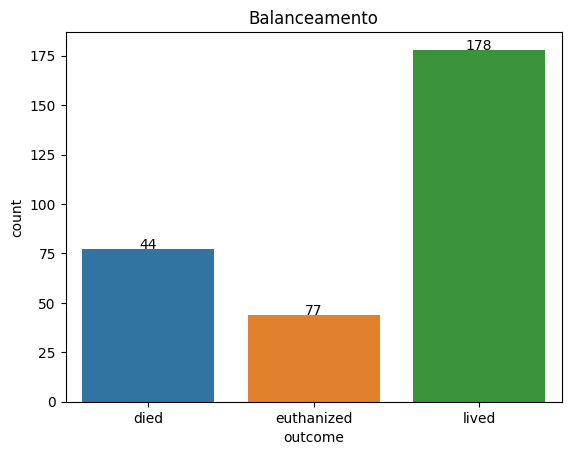

In [ ]:
# Balanceamento
graph = sns.countplot(data=horse_data, x='outcome')
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(horse_data['outcome'].value_counts()).sort_values()[idx], ha="center")

plt.show()

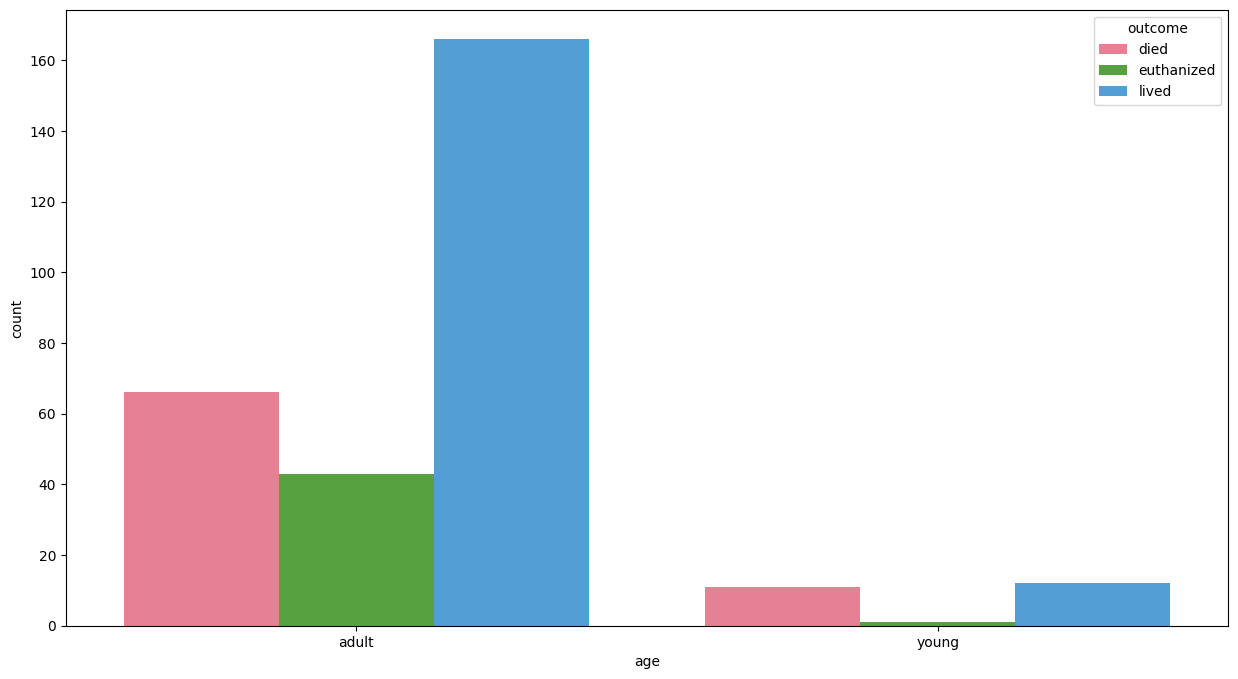

In [ ]:
# Atributo Age
plt.figure(figsize=(15,8))
sns.countplot(data=horse_data, x='age', hue='outcome', palette='husl')
plt.show()

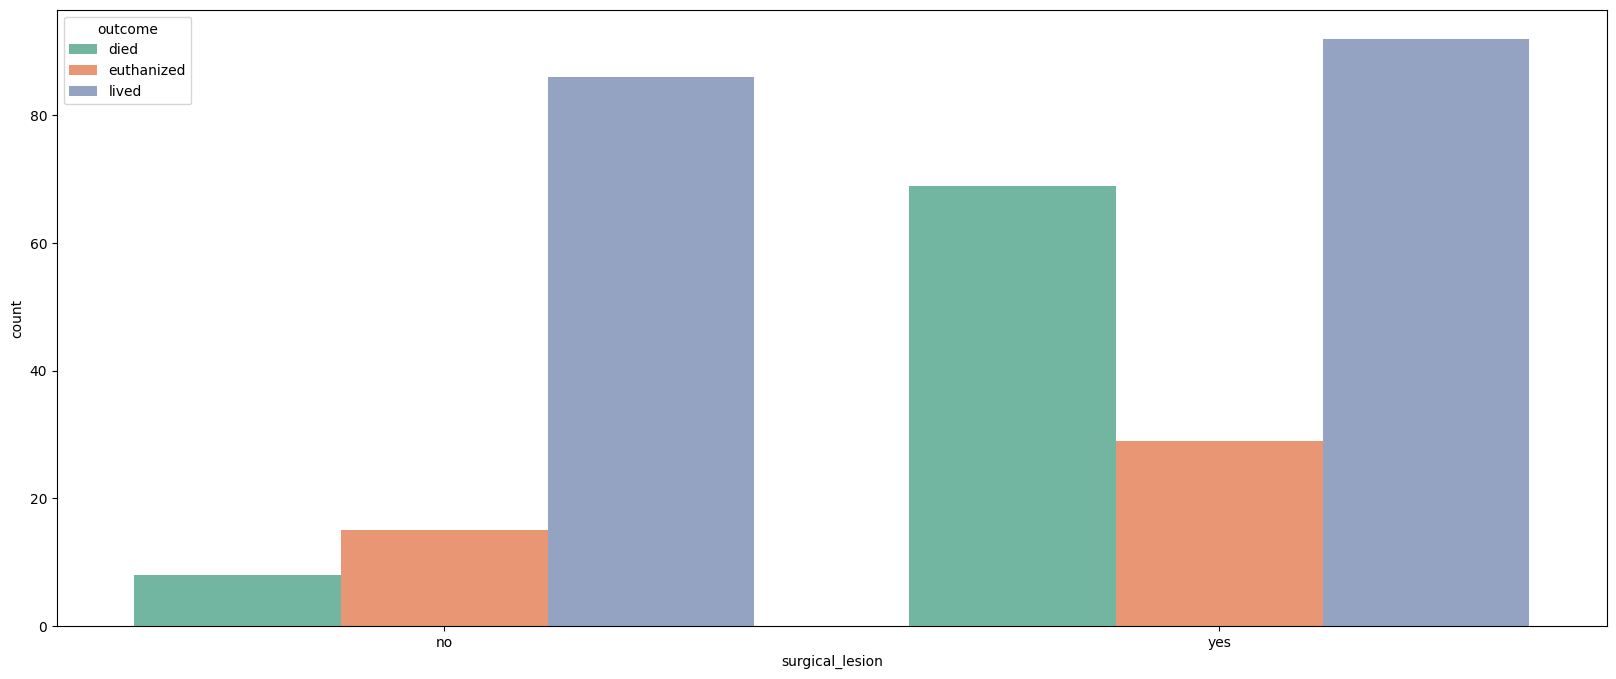

In [ ]:
# Atributo surgical_lesion
plt.figure(figsize=(20,8))
sns.countplot(data=horse_data, x='surgical_lesion', hue='outcome', palette='Set2')
plt.show()

In [ ]:
# Usando value_counts() para contar as ocorrências de cada classe na coluna 'age'
contagem_classes = horse_data['age'].value_counts()

# Exibindo o total de dados em cada classe
print(contagem_classes)


adult    275
young     24
Name: age, dtype: int64


In [ ]:
# Criando uma cópia do DataFrame original para não modificar os dados originais
temp_df = horse_data.copy()
temp_df['outcome']

0            died
1      euthanized
2           lived
3            died
4            died
          ...    
294    euthanized
295    euthanized
296          died
297         lived
298    euthanized
Name: outcome, Length: 299, dtype: object

Conclusões relacionadas ao tópico:

- Base desbalanceada e com alguns atributos no formato string


# Separação X e y

In [ ]:
x_horse_data = horse_data.loc[:,horse_data.columns != 'outcome']
y_horse_data = horse_data.loc[:,horse_data.columns == 'outcome']

In [ ]:
x_horse_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no


In [ ]:
y_horse_data.head()

,outcome
0,died
1,euthanized
2,lived
3,died
4,died


#Missing

In [ ]:
y_horse_data.isna().sum()

outcome    0
dtype: int64

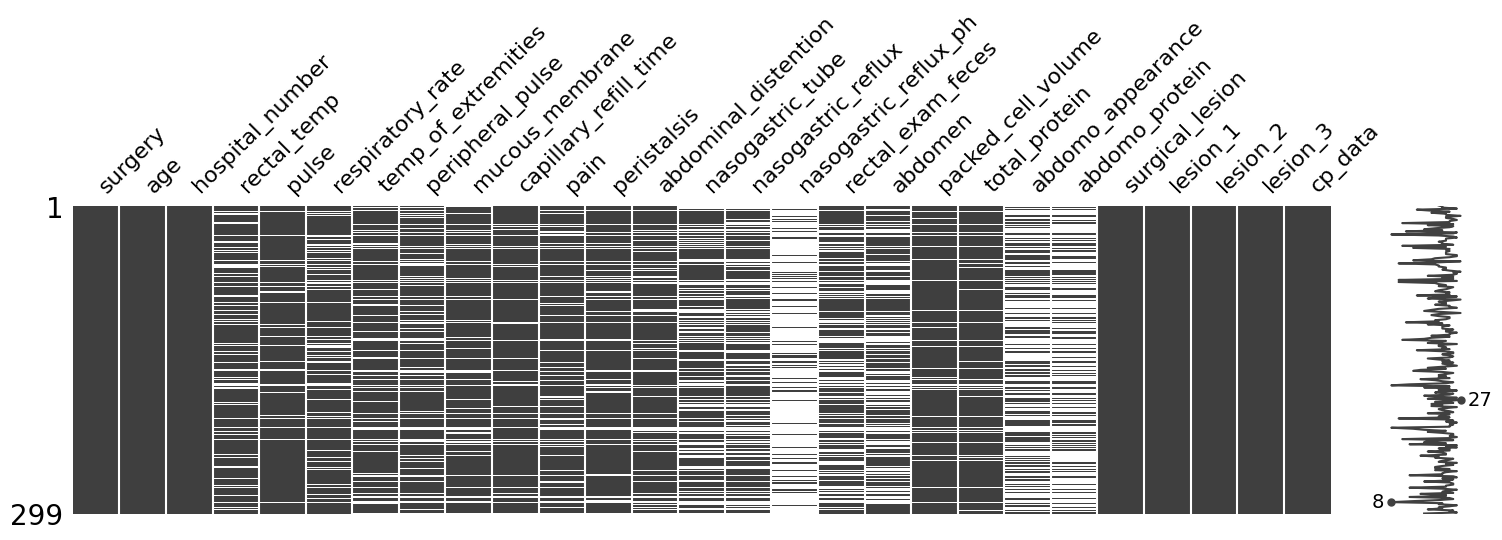

In [ ]:
# Visualizar missing
import missingno as msno
msno.matrix(x_horse_data, figsize=(18,4));

In [ ]:
# Calcula o total de linhas com valores ausentes em cada coluna
total_linhas_ausentes = x_horse_data.isnull().sum()

# Exibe o resultado
print(total_linhas_ausentes)


surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


In [ ]:
# Retira colunas com muitas linhas ausentes
colunas_a_excluir = ['hospital_number', 'nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein',
                     'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen']

# Remove as colunas especificadas do DataFrame original "horse_data"
x_horse_data.drop(colunas_a_excluir, axis=1, inplace=True)

In [ ]:
# Verifica missing por linha
percent_missing_rows = x_horse_data.apply(lambda x: x.isnull().sum() * 100 / len(x_horse_data),
                                     axis=1).sort_values(ascending=False)
df = pd.DataFrame({'row_index': x_horse_data.index, 'percent_missing': percent_missing_rows})
df.head(100)

,row_index,percent_missing
174,0,4.013378
215,1,4.013378
287,2,4.013378
28,3,4.013378
56,4,3.344482
...,...,...
75,95,0.668896
1,96,0.668896
253,97,0.668896
40,98,0.668896


In [ ]:
# Calcula o total de linhas com valores ausentes em cada coluna após limpeza
total_linhas_ausentes = x_horse_data.isnull().sum()

total_linhas_ausentes

surgery                   0
age                       0
rectal_temp              60
pulse                    24
respiratory_rate         58
temp_of_extremities      56
peripheral_pulse         69
mucous_membrane          47
capillary_refill_time    32
pain                     55
peristalsis              44
abdominal_distention     56
packed_cell_volume       29
total_protein            33
surgical_lesion           0
lesion_1                  0
lesion_2                  0
lesion_3                  0
cp_data                   0
dtype: int64

In [ ]:
x_horse_data.shape

(299, 19)

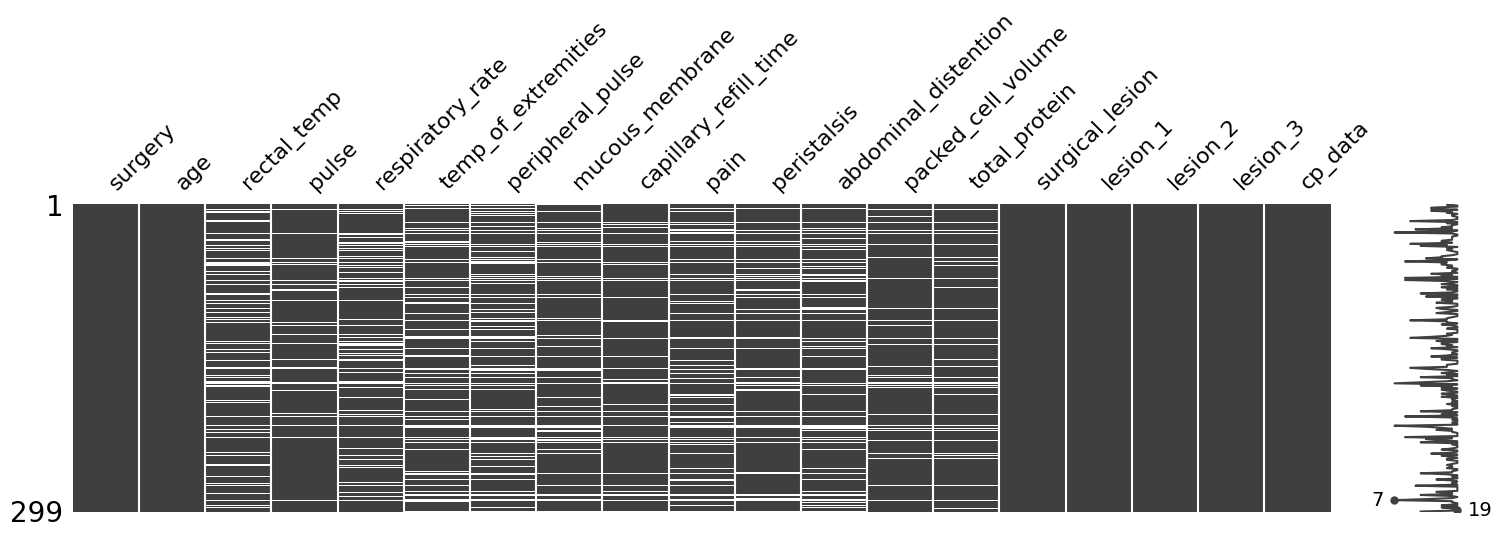

In [ ]:
# Verificando os dados missings após a limpeza
msno.matrix(x_horse_data, figsize=(18,4));

In [ ]:
# Transformando dados categóricos para numéricos
from sklearn.preprocessing import LabelEncoder

# Dicionário para armazenar os LabelEncoders por coluna
encoders = {}

# Lista com as colunas que serão convertidas em números inteiros
colunas_categoricas = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
                      'mucous_membrane','capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
                      'cp_data','surgical_lesion']

# Percorre as colunas e realiza a conversão para números inteiros utilizando o LabelEncoder.
for coluna in colunas_categoricas:
    encoder = LabelEncoder()
    x_horse_data.loc[:,coluna] = encoder.fit_transform(x_horse_data.loc[:,coluna])
    encoders[coluna] = encoder

y_encoder = LabelEncoder()
y_horse_data = y_encoder.fit_transform(y_horse_data)

In [ ]:
colunas_numericas = list(set(x_horse_data.columns) - set(colunas_categoricas))
colunas_numericas

['pulse',
 'lesion_2',
 'respiratory_rate',
 'lesion_1',
 'total_protein',
 'rectal_temp',
 'lesion_3',
 'packed_cell_volume']

In [ ]:
# Preenchendo valores ausentes das colunas
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')

x_horse_data[colunas_categoricas] = imp_cat.fit_transform(x_horse_data[colunas_categoricas])
x_horse_data[colunas_numericas] = imp_num.fit_transform(x_horse_data[colunas_numericas])

In [ ]:
x_horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    int64  
 6   peripheral_pulse       299 non-null    int64  
 7   mucous_membrane        299 non-null    int64  
 8   capillary_refill_time  299 non-null    int64  
 9   pain                   299 non-null    int64  
 10  peristalsis            299 non-null    int64  
 11  abdominal_distention   299 non-null    int64  
 12  packed_cell_volume     299 non-null    float64
 13  total_protein          299 non-null    float64
 14  surgical_lesion        299 non-null    int64  
 15  lesion

In [ ]:
# Verifica se tem mais algum missing
print(x_horse_data.isnull().sum())

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


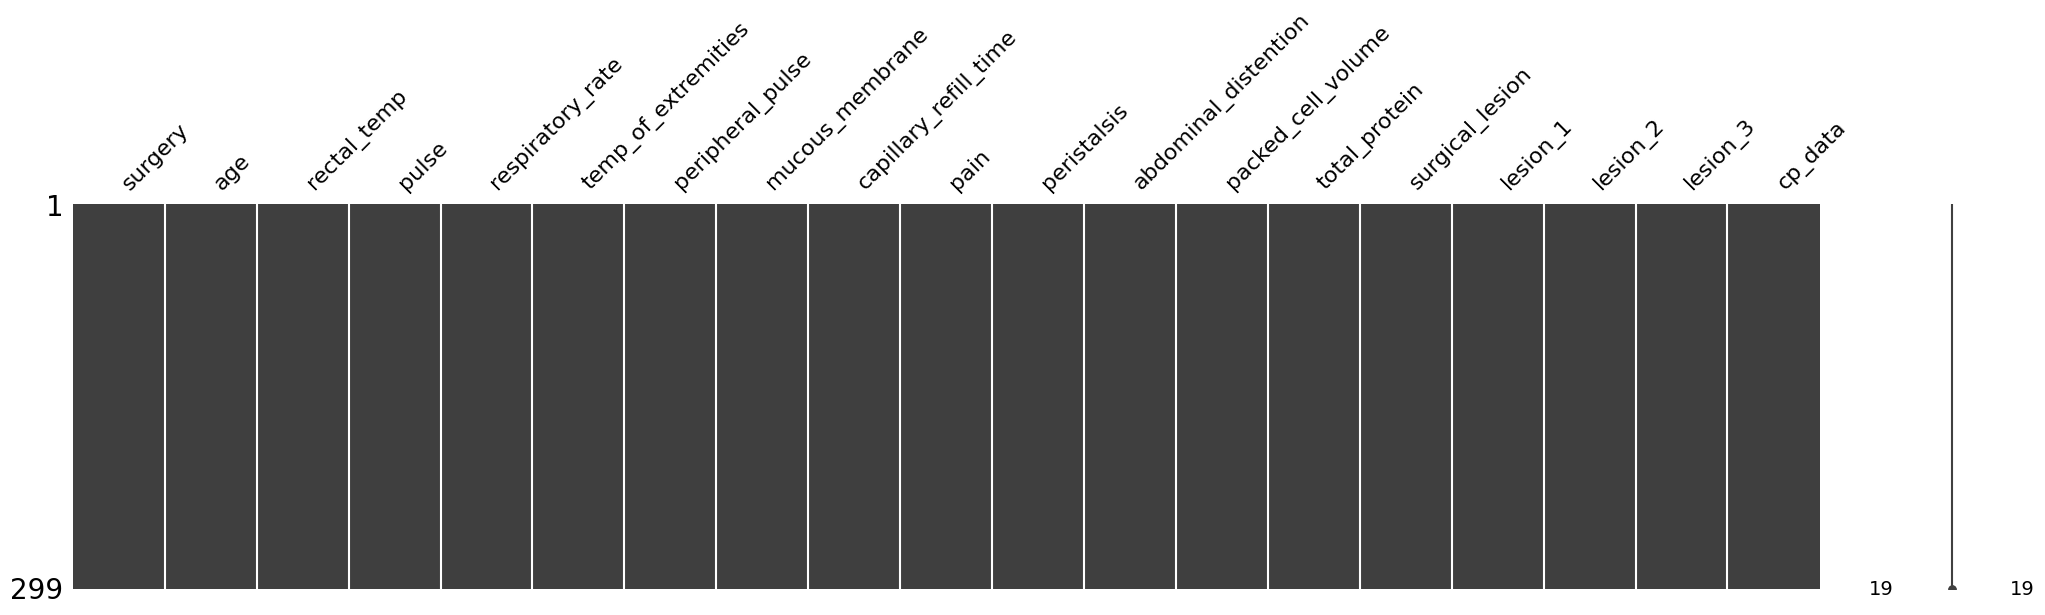

In [ ]:
# Visualiza os missing após inputar dados faltantes
msno.matrix(pd.DataFrame(x_horse_data), figsize=(25,5));

In [ ]:
# Calcula a variância de cada coluna no DataFrame
variancias = x_horse_data.var()

# Conta o total de colunas com variância zero
colunas_constantes = variancias[variancias == 0.000].shape[0]

# Exibe o total de colunas com variância zero
print(f"Total de colunas com variância zero (colunas constantes): {colunas_constantes}")

Total de colunas com variância zero (colunas constantes): 0


In [ ]:
x_horse_data.shape

(299, 19)

In [ ]:
# Verifica se existem colunas com valores não numéricos
num_cols = 0

for column in x_horse_data.columns:
    if not pd.api.types.is_numeric_dtype(x_horse_data[column]):
        print(f"A coluna '{column}' contém valores não numéricos.")
    else:
        num_cols += 1

if num_cols == len(x_horse_data.columns):
    print("Todas as colunas são numéricas.")


Todas as colunas são numéricas.


#Normalizando

In [ ]:
# Verificando a base antes da normalização
x_horse_data.head(10)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,38.500000,66.0,28.000000,1,3,6,2,2,0,2,45.000000,8.400000,0,11300.0,0.0,0.0,0
1,1,0,39.200000,88.0,20.000000,4,4,4,1,3,0,3,50.000000,85.000000,0,2208.0,0.0,0.0,0
2,0,0,38.300000,40.0,24.000000,2,2,5,1,3,2,1,33.000000,6.700000,0,0.0,0.0,0.0,1
3,1,1,39.100000,164.0,84.000000,0,2,2,2,1,0,2,48.000000,7.200000,1,2208.0,0.0,0.0,1
4,0,0,37.300000,104.0,35.000000,4,4,2,2,5,4,4,74.000000,7.400000,0,4300.0,0.0,0.0,0
5,0,0,38.168619,72.0,30.460581,3,2,5,1,1,2,3,46.307407,24.274436,0,0.0,0.0,0.0,0
6,1,0,37.900000,48.0,16.000000,2,2,3,1,3,2,0,37.000000,7.000000,1,3124.0,0.0,0.0,0
7,1,0,38.168619,60.0,30.460581,1,4,6,1,5,0,3,44.000000,8.300000,1,2208.0,0.0,0.0,0
8,0,0,38.168619,80.0,36.000000,1,0,5,1,4,0,2,38.000000,6.200000,1,3205.0,0.0,0.0,0
9,0,1,38.300000,90.0,30.460581,2,4,3,1,2,2,1,40.000000,6.200000,0,0.0,0.0,0.0,1


In [ ]:
# Fazendo a normalização
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_scaler = StandardScaler()

normalized_x_horse_data = copy.deepcopy(x_horse_data)
normalized_x_horse_data[colunas_numericas] = norm_scaler.fit_transform(normalized_x_horse_data[colunas_numericas])
normalized_x_horse_data

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,0.506209,-0.218798,-0.155463,1,3,6,2,2,0,2,-0.132070,-6.162094e-01,0,1.415021,-0.139371,-0.057928,0
1,1,0,1.575511,0.583463,-0.660914,4,4,4,1,3,0,3,0.373015,2.357228e+00,0,-0.268864,-0.139371,-0.057928,0
2,0,0,0.200694,-1.166925,-0.408189,2,2,5,1,3,2,1,-1.344274,-6.821995e-01,0,-0.677797,-0.139371,-0.057928,1
3,1,1,1.422753,3.354910,3.382695,0,2,2,2,1,0,2,0.170981,-6.627906e-01,1,-0.268864,-0.139371,-0.057928,1
4,0,0,-1.326880,1.166925,0.286807,4,4,2,2,5,4,4,2.797423,-6.550271e-01,0,0.118585,-0.139371,-0.057928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,0.000000,1.750388,2.498156,0,4,4,2,1,0,4,0.878100,1.580873e+00,0,-0.084214,-0.139371,-0.057928,0
295,0,0,-1.479638,0.000000,-0.408189,1,1,4,2,4,2,0,-0.233087,1.379082e-16,1,-0.268864,-0.139371,-0.057928,1
296,1,0,-1.021366,0.000000,-0.029100,0,3,4,1,4,0,0,1.383185,-6.783177e-01,1,-0.084214,-0.139371,-0.057928,0
297,1,0,-2.548940,1.021059,-0.408189,1,3,5,1,3,2,0,0.373015,-7.093719e-01,1,-0.268864,-0.139371,-0.057928,1


In [ ]:
# Shape da base normalizada
normalized_x_horse_data.shape

(299, 19)

#Balanceamento

In [ ]:
np.unique(y_horse_data, return_counts=True)

(array([0, 1, 2]), array([ 77,  44, 178]))

In [ ]:
# Balanceamento
from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(sampling_strategy={0:100, 1:100, 2:178})

# Aplica o SMOTE para balancear as classes
X_balanced, y_balanced = smote.fit_resample(normalized_x_horse_data, y_horse_data)

# Verifica a contagem de amostras por classe no DataFrame balanceado
np.unique(y_balanced, return_counts=True)

(array([0, 1, 2]), array([100, 100, 178]))

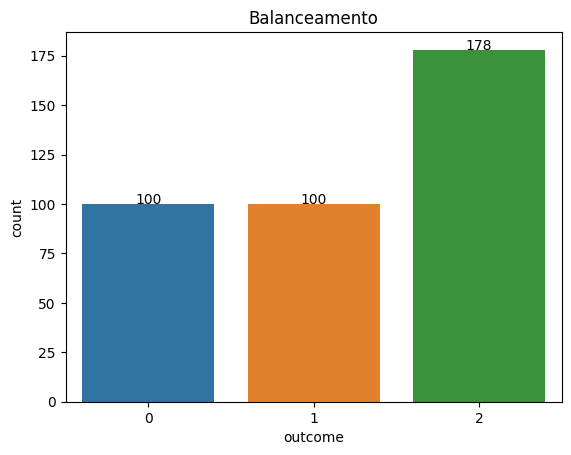

In [ ]:
# Balanceamento
graph = sns.countplot(data=pd.DataFrame(y_balanced, columns=['outcome']), x='outcome')
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(np.unique(y_balanced, return_counts=True))[1][idx], ha="center")

plt.show()

In [ ]:
X_balanced.shape

(378, 19)

#PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_balanced)
df = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

           0
0   0.250308
1   0.374304
2   0.484250
3   0.566591
4   0.629965
5   0.689176
6   0.739406
7   0.782736
8   0.822601
9   0.857653
10  0.888923
11  0.913928
12  0.936374
13  0.958301
14  0.972536
15  0.986051
16  0.993428
17  0.998367
18  1.000000


In [ ]:
# 19
cut = 19
X_train = pca.transform(X_balanced)
X_train = X_train[:, 0:cut]
X_train.shape

(378, 19)

Conclusões relacionadas ao tópico:

- Foram identificados diversos atributos com várias linhas contendo dados faltantes. Esses atributos foram removidos para evitar o viés nos resultados e os dados faltantes remanescentes foram substituidos.
- Além disso, a base de dados apresentou um desequilíbrio, o que levou à inserção de dados sintéticos para equilibrar as classes.
- Atributos no formato categórico foram convertidos para numéricos para que o modelo pudesse ser gerado.

#Tratamento da base de teste

###Carga da base

In [ ]:
# Carrega base de teste
horse_test = pd.read_csv('/content/drive/MyDrive/Felipe Quinto/trabalho_manoela/horseTest.csv')

In [ ]:
# Verificando o tamanho da base
horse_test.shape

(89, 28)

In [ ]:
horse_test.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,...,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,...,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,...,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,...,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes


In [ ]:
# Verificando as medidas estatísticas
horse_test.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,89.000000,73.000000,84.000000,73.000000,14.000000,82.000000,79.000000,29.000000,89.000000,89.000000,89.000000
mean,45.000000,38.175342,74.797619,34.232877,5.028571,45.621951,22.930380,2.782759,4582.415730,218.483146,24.820225
std,25.836021,0.808768,31.099831,19.158346,1.728240,9.196940,26.512955,2.251042,7088.406982,1082.038807,234.153532
min,1.000000,36.000000,36.000000,9.000000,2.000000,31.000000,3.300000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,37.800000,52.500000,20.000000,4.125000,39.000000,6.500000,1.300000,2111.000000,0.000000,0.000000
50%,45.000000,38.100000,65.000000,30.000000,5.150000,44.000000,7.300000,2.000000,3111.000000,0.000000,0.000000
75%,67.000000,38.600000,93.000000,42.000000,6.625000,50.000000,54.500000,3.200000,4206.000000,0.000000,0.000000
max,89.000000,40.800000,184.000000,90.000000,7.200000,74.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


###Pré processamento

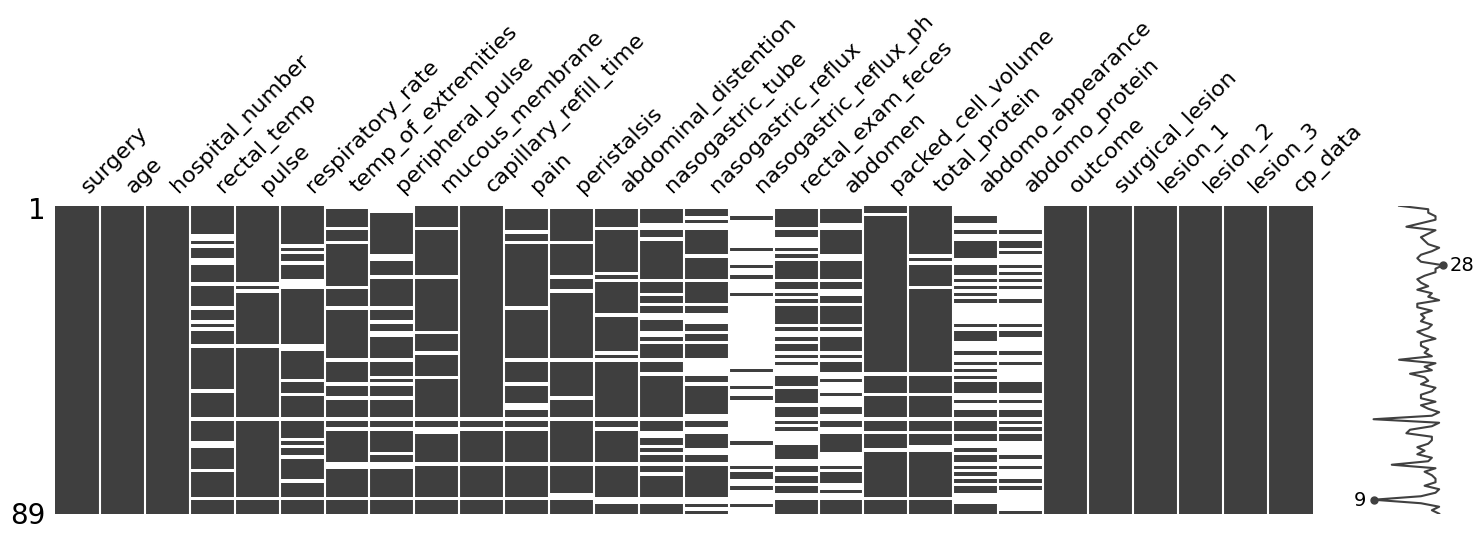

In [ ]:
# Visualiza missing
import missingno as msno
msno.matrix(horse_test, figsize=(18,4));

In [ ]:
x_horse_test = horse_test.loc[:,horse_test.columns != 'outcome']
y_horse_test = horse_test.loc[:,horse_test.columns == 'outcome']

In [ ]:
x_horse_test.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,...,distend_small,50.0,7.8,NaN,NaN,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,...,distend_large,NaN,7.0,NaN,NaN,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,...,normal,37.0,6.1,clear,NaN,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,...,distend_large,40.0,7.0,clear,NaN,yes,4205,0,0,yes


In [ ]:
y_horse_test.head()

,outcome
0,died
1,lived
2,lived
3,died
4,lived


In [ ]:
y_horse_test.isna().sum()

outcome    0
dtype: int64

In [ ]:
# Retira as colunas que continham muitas linhas ausentes da base de TREINO
print("Antes: ", x_horse_test.shape)
x_horse_test.drop(colunas_a_excluir, axis=1, inplace=True)
print("Depois: ", x_horse_test.shape)

Antes:  (89, 27)
Depois:  (89, 19)


In [ ]:
# Transformando dados categóricos para numéricos

# Percorre as colunas e converte em números inteiros usando LabelEncoder de acordo com a base de TREINO
for coluna in colunas_categoricas:
    x_horse_test.loc[:,coluna] = encoders[coluna].transform(x_horse_test.loc[:,coluna])

y_horse_test = y_encoder.transform(y_horse_test)

In [ ]:
# # Preenchendo valores ausentes das colunas com a média e moda
x_horse_test[colunas_categoricas] = imp_cat.transform(x_horse_test[colunas_categoricas])
x_horse_test[colunas_numericas] = imp_num.transform(x_horse_test[colunas_numericas])

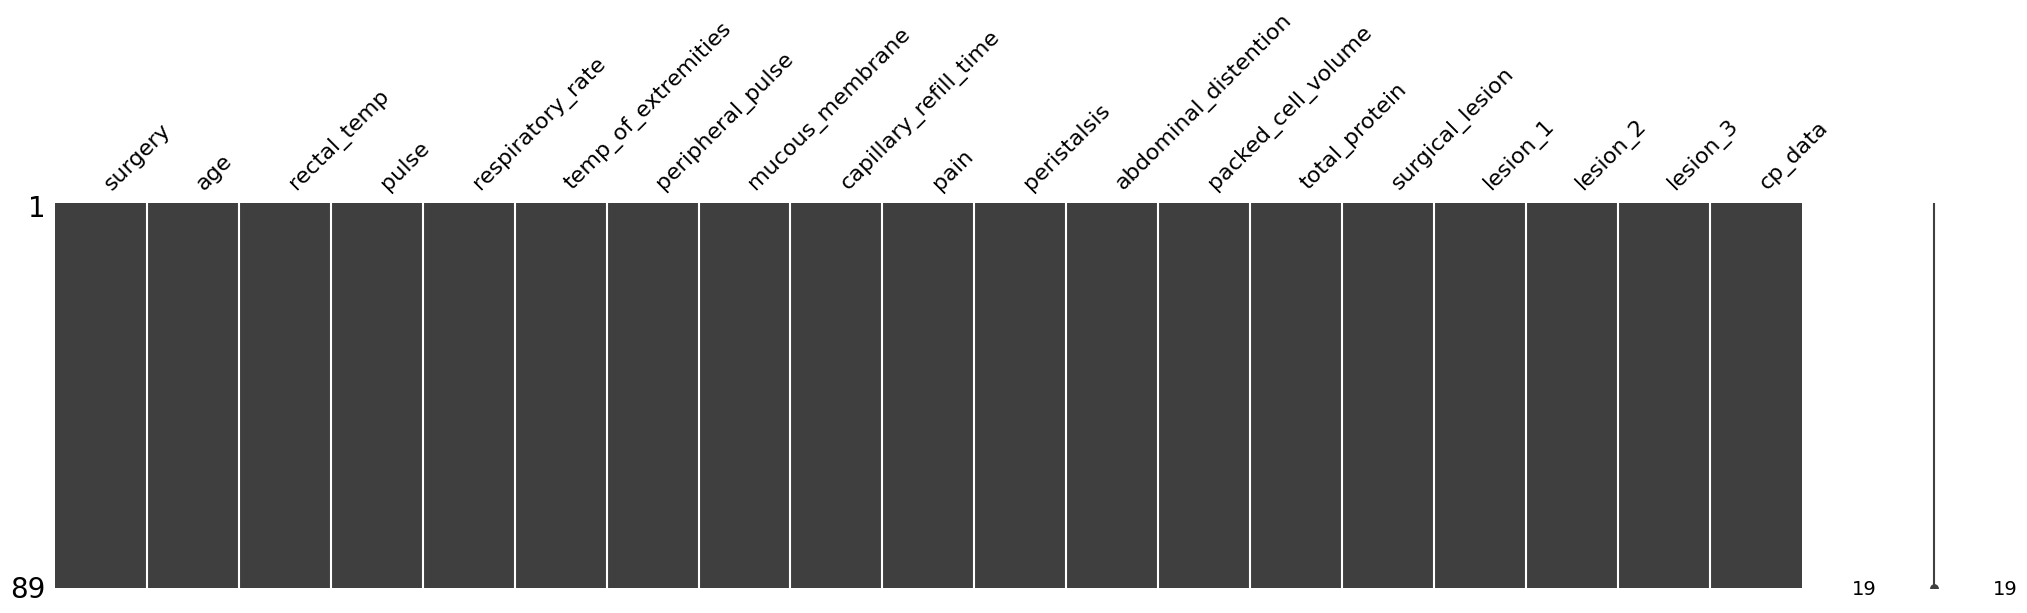

In [ ]:
# visualiza os missing após inputar dados faltantes
msno.matrix(pd.DataFrame(x_horse_test), figsize=(25,5));

In [ ]:
x_horse_test.shape

(89, 19)

In [ ]:
# Verifica se existem colunas com valores não numéricos
num_cols_test = 0

for column_test in x_horse_test.columns:
    if not pd.api.types.is_numeric_dtype(x_horse_test[column_test]):
        print(f"A coluna '{column_test}' contém valores não numéricos.")
    else:
        num_cols_test += 1

if num_cols_test == len(x_horse_test.columns):
    print("Todas as colunas são numéricas.")

Todas as colunas são numéricas.


###Normalizando

In [ ]:
x_horse_test.head(10)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,37.300000,104.0,35.0,4,4,2,2,5,4,4,74.000000,7.4,0,4300.0,0.0,0.0,0
1,0,0,39.100000,72.0,52.0,3,4,0,1,1,1,3,50.000000,7.8,1,2111.0,0.0,0.0,0
2,1,0,37.200000,42.0,12.0,3,2,3,1,3,2,0,46.307407,7.0,0,4124.0,0.0,0.0,0
3,0,1,38.000000,92.0,28.0,2,2,0,1,0,2,3,37.000000,6.1,0,0.0,0.0,0.0,1
4,1,0,37.600000,64.0,21.0,2,2,0,1,1,2,1,40.000000,7.0,1,4205.0,0.0,0.0,1
5,1,0,38.600000,42.0,34.0,3,2,4,0,1,2,1,48.000000,7.2,1,3111.0,0.0,0.0,0
6,1,1,38.300000,130.0,60.0,4,3,6,1,1,0,4,50.000000,70.0,1,3111.0,0.0,0.0,0
7,1,0,37.800000,48.0,12.0,1,2,3,1,5,2,3,37.000000,5.5,0,4122.0,0.0,0.0,1
8,1,0,38.168619,100.0,30.0,1,3,4,2,2,0,2,52.000000,6.6,1,1124.0,0.0,0.0,0
9,0,0,38.168619,104.0,24.0,0,3,5,2,4,0,0,73.000000,8.4,1,7111.0,0.0,0.0,0


In [ ]:
# Normalizando

normalized_x_horse_test = copy.deepcopy(x_horse_test)
normalized_x_horse_test[colunas_numericas] = norm_scaler.transform(normalized_x_horse_test[colunas_numericas])
normalized_x_horse_test

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,-1.326880,1.166925,0.286807,4,4,2,2,5,4,4,2.797423,-6.550271e-01,0,0.118585,-0.139371,-0.057928,0
1,0,0,1.422753,0.000000,1.360891,3,4,0,1,1,1,3,0.373015,-6.395000e-01,1,-0.286829,-0.139371,-0.057928,0
2,1,0,-1.479638,-1.093992,-1.166365,3,2,3,1,3,2,0,0.000000,-6.705542e-01,0,0.085989,-0.139371,-0.057928,0
3,0,1,-0.257578,0.729328,-0.155463,2,2,0,1,0,2,3,-0.940206,-7.054901e-01,0,-0.677797,-0.139371,-0.057928,1
4,1,0,-0.868608,-0.291731,-0.597733,2,2,0,1,1,2,1,-0.637155,-6.705542e-01,1,0.100991,-0.139371,-0.057928,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,0,0.000000,0.000000,0.000000,4,4,6,3,5,4,4,0.000000,1.379082e-16,1,-0.284421,-0.139371,-0.057928,0
85,0,0,0.658966,-0.984593,-0.913640,3,2,0,1,0,1,4,-0.334104,1.309149e+00,0,-0.677797,-0.139371,-0.057928,0
86,1,0,1.117238,0.291731,0.855439,1,3,5,1,1,2,0,0.777083,-6.899630e-01,1,0.639197,-0.139371,-0.057928,0
87,1,0,-1.785153,-0.218798,-0.660914,2,3,0,1,4,2,0,-1.142240,-6.744360e-01,1,5.083933,-0.139371,-0.057928,0


###PCA

In [ ]:
X_test = pca.transform(x_horse_test)
X_test = X_test[:, 0:cut]
X_test.shape

(89, 19)

Conclusões relacionadas ao tópico:

Todos os tratamentos feitos na base de treino foram replicados na base de teste para não prejudicar o desempenho do modelo. Isso foi importante porque garantiu que o modelo fosse treinado em dados representativos da população real e que não fosse sobrecarregado por nenhum atributo específico.

# Modelos




In [ ]:
X_balanced.shape, normalized_x_horse_test.shape

((378, 19), (89, 19))

In [ ]:
y_balanced.shape, y_horse_test.shape

((378,), (89,))

# SVM

In [ ]:
# Treinando modelo
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # criando modelo
  model.fit(X_train, y_train)     # treinando modelo
  return model

model = train(X_balanced, y_balanced, seed)

### Avaliando modelo treinado na base de teste

Resultados de Treino
Acurácia:  0.746031746031746
Kappa:  0.586546349466776
Weighted F1-score: 0.7387371865459854


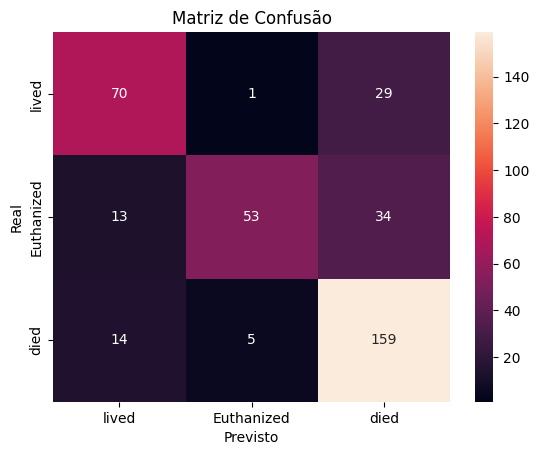

Resultados de Teste
Acurácia:  0.8426966292134831
Kappa:  0.7000481463649495
Weighted F1-score: 0.8379791465701778


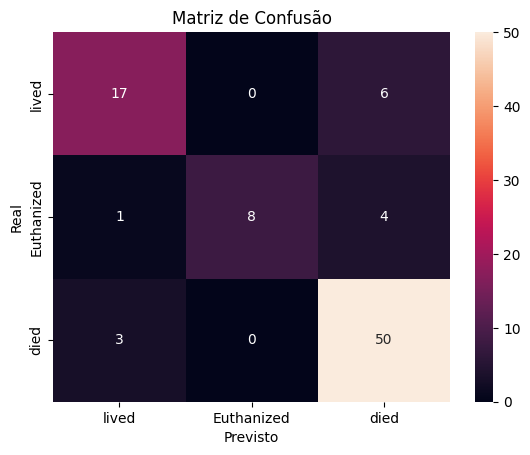

In [ ]:
# Verificando as métricas
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  from sklearn.metrics import f1_score

  # F1-score ponderado
  f1_weighted = f1_score(y_test, y_pred, average='weighted')
  print("Weighted F1-score:", f1_weighted)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocando os nomes
  ax.xaxis.set_ticklabels(['lived','Euthanized', 'died'])
  ax.yaxis.set_ticklabels(['lived','Euthanized', 'died'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_balanced, y_balanced)

print('Resultados de Teste')
predict_and_evaluate(model, normalized_x_horse_test, y_horse_test)

# Regressão logística

In [ ]:
# treina o modelo
from sklearn.linear_model import LogisticRegression

def train_and_predict(X_train, y_train, X_test):
  model = LogisticRegression()  # max_iter=10000
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) # inferência do teste

  return model, y_pred

model_regrLog, y_pred = train_and_predict(X_balanced, y_balanced, normalized_x_horse_test)

### Avaliando modelo treinado na base de teste

Acurácia:  0.7303370786516854
Kappa:  0.5149863760217983
Weighted F1-score: 0.7292087018885967


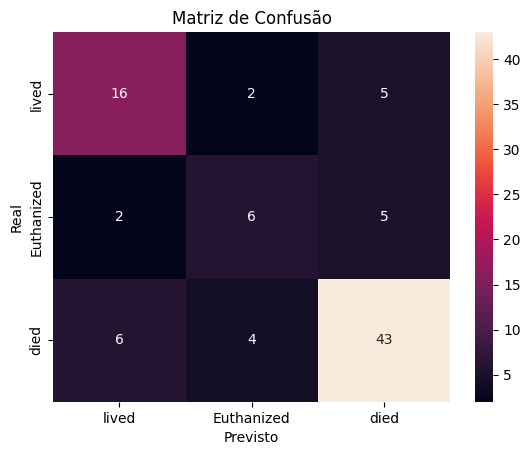

In [ ]:
predict_and_evaluate(model_regrLog, normalized_x_horse_test, y_horse_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parâmetros testados
tuned_parameters = [{'C': [0.1, 1.0, 10]}]

# Executa o grid search
model_grid = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='f1_weighted')
model_grid.fit(X_balanced, y_balanced)
y_pred = model_grid.predict(normalized_x_horse_test)

Acurácia:  0.7640449438202247
Kappa:  0.5616791744840525
Weighted F1-score: 0.7580386177357354


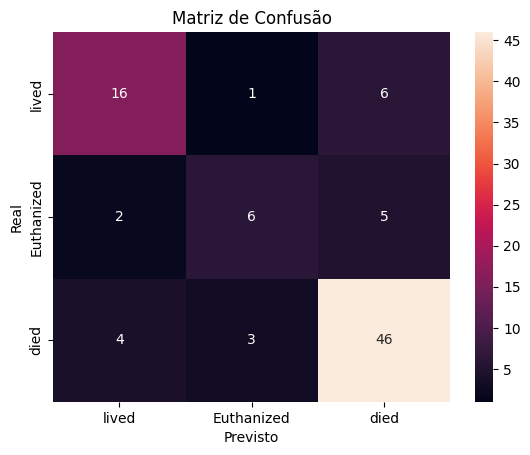

In [ ]:
predict_and_evaluate(model_grid, normalized_x_horse_test, y_horse_test)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def train(X_train, y_train, x_test, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  y_pred = model.predict(x_test)  # inferência do teste

  return model, y_pred

model_knn, y_pred = train(X_balanced, y_balanced, normalized_x_horse_test)

### Avaliando modelo treinado na base de teste

Acurácia:  0.8089887640449438
Kappa:  0.6572270049841413
Weighted F1-score: 0.8089887640449438


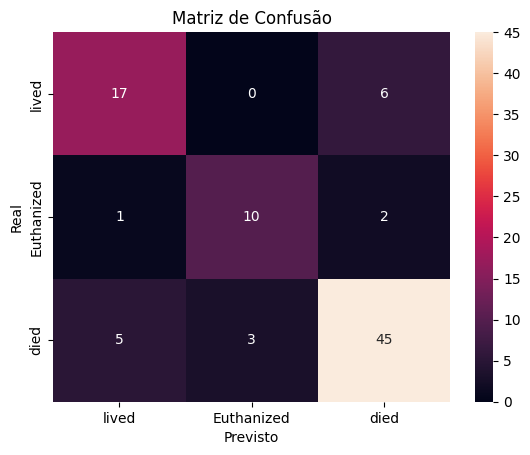

In [ ]:
predict_and_evaluate(model_knn, normalized_x_horse_test, y_horse_test)

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14]}]

# Executa o grid search
model_gridknn = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
model_gridknn.fit(X_balanced, y_balanced)

y_pred = model_gridknn.predict(normalized_x_horse_test)

Acurácia:  0.8876404494382022
Kappa:  0.7892992424242424
Weighted F1-score: 0.8851800884782524


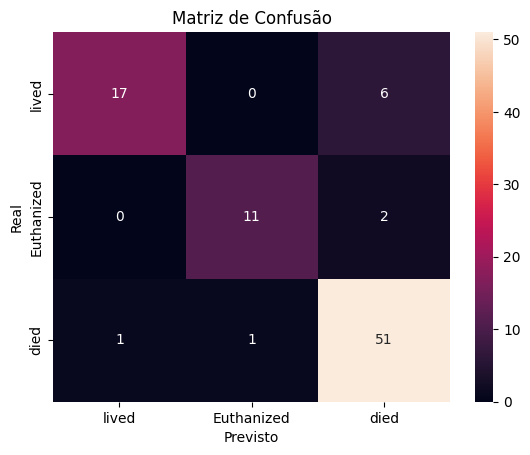

In [ ]:
predict_and_evaluate(model_gridknn, normalized_x_horse_test, y_horse_test)

# ÁRVORE DE DECISAO

In [ ]:
# Treina modelo
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed)
model_decision_tree.fit(X_balanced, y_balanced);

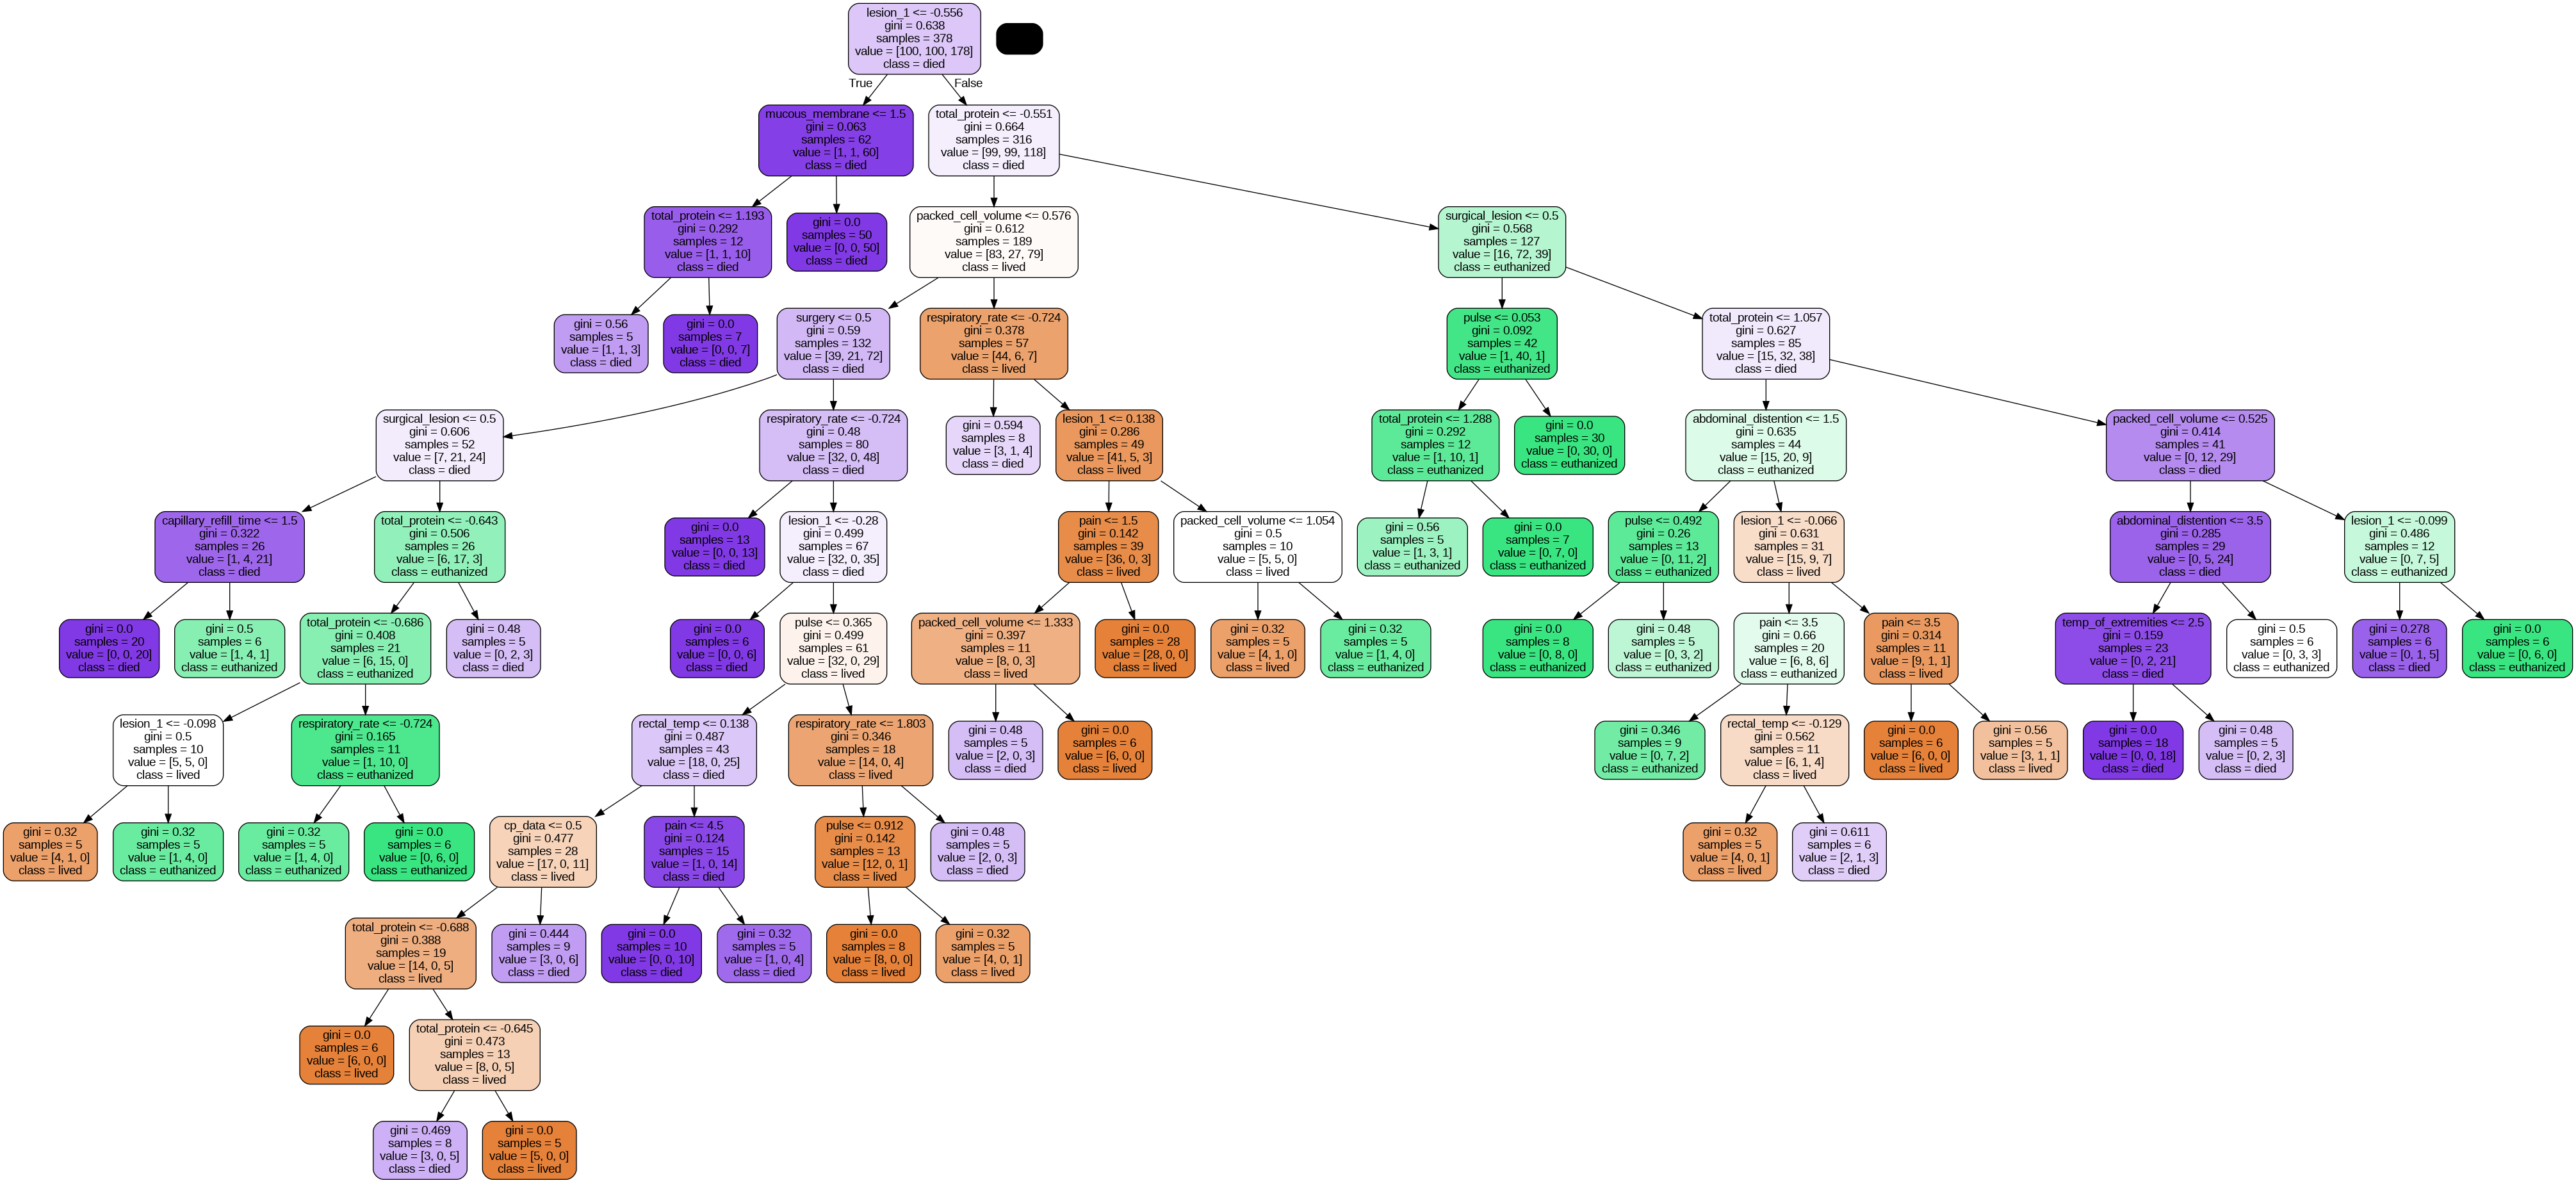

In [ ]:
# Visualização gráfica da árvore de decisão
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(model_decision_tree,
                           feature_names=list(pd.DataFrame(X_balanced).columns.values),
                           class_names=['lived', 'euthanized', 'died'],
                           rounded=True,
                           filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# métrica de treino: acurácia
model_decision_tree.score(X_balanced, y_balanced)

0.8809523809523809

In [ ]:
# Avalia modelo treinado na base de teste: acurácia
model_decision_tree.score(normalized_x_horse_test, y_horse_test) # acurácia

0.8651685393258427

Resultados de Treino
Acurácia:  0.8809523809523809
Kappa:  0.8113897944248554
Weighted F1-score: 0.8799447070828221


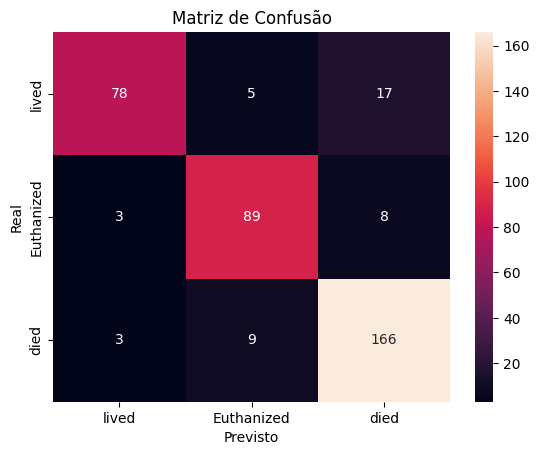

Resultados de Teste
Acurácia:  0.8651685393258427
Kappa:  0.7602155365963179
Weighted F1-score: 0.8664526484751204


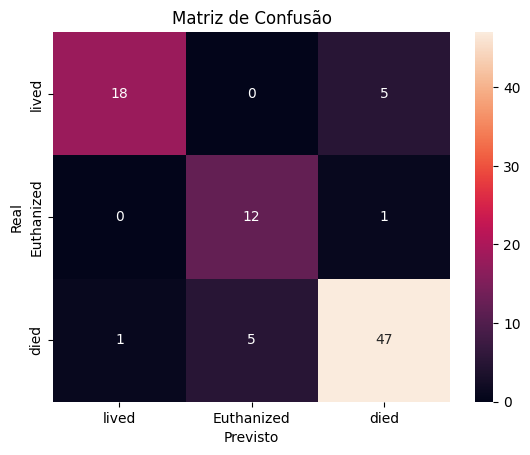

In [ ]:
print('Resultados de Treino')
predict_and_evaluate(model_decision_tree, X_balanced, y_balanced)
print('Resultados de Teste')
predict_and_evaluate(model_decision_tree, normalized_x_horse_test, y_horse_test)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defini parâmetros a serem utilizados
tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [None, 2,4,5,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

# Executa o grid search
model_dt_grid = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model_dt_grid.fit(X_balanced, y_balanced);

In [ ]:
model_dt_grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Resultados de Treino
Acurácia:  1.0
Kappa:  1.0
Weighted F1-score: 1.0


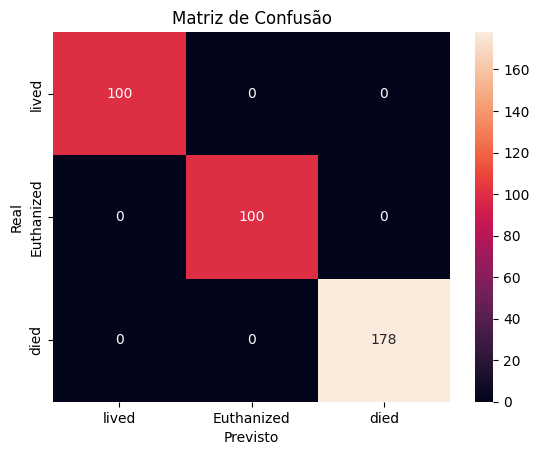

Resultados de Teste
Acurácia:  1.0
Kappa:  1.0
Weighted F1-score: 1.0


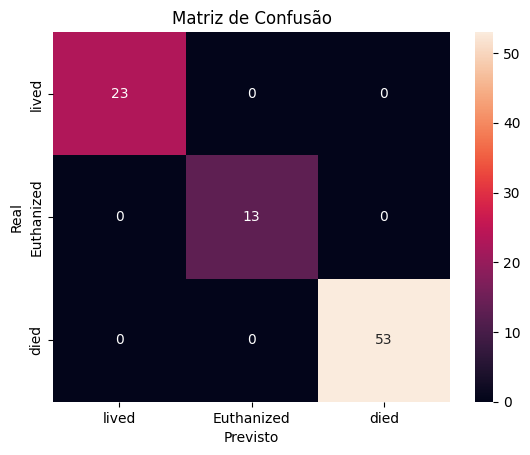

In [ ]:
print('Resultados de Treino')
predict_and_evaluate(model_dt_grid, X_balanced, y_balanced)
print('Resultados de Teste')
predict_and_evaluate(model_dt_grid, normalized_x_horse_test, y_horse_test)

# Comparação entre os modelos testados

| Modelo   | SVM   | RL    | KNN   | DT |
|----------|-----  |-----  |----   |--- |
| Acuracia | 0.8426| 0.7640| 0.8876| 1.0|
| Kappa    | 0.7000| 0.5616| 0.7892| 1.0|
| F1       | 0.8379| 0.7580| 0.8851| 1.0|

# Uma vez escolhido o modelo Decision Tree foram feitos outros testes para verificar a necessidade das etapas de pré processamento.

##Após Missing

Resultados de Treino
Acurácia:  1.0
Kappa:  1.0
Weighted F1-score: 1.0


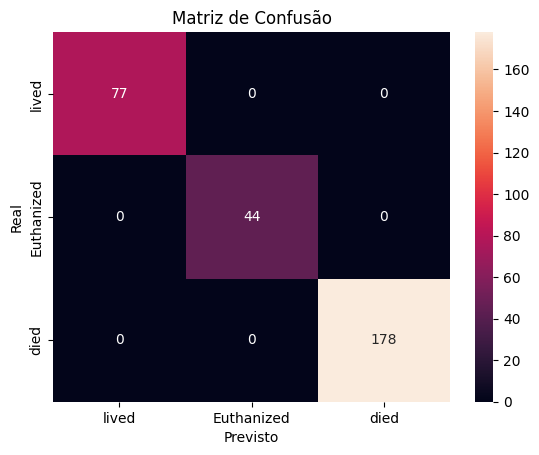

Resultados de Teste
Acurácia:  1.0
Kappa:  1.0
Weighted F1-score: 1.0


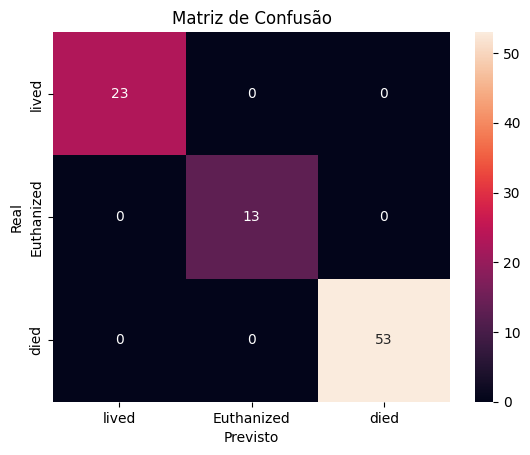

In [ ]:
model_dt_missing = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model_dt_missing.fit(x_horse_data, y_horse_data);
print('Resultados de Treino')
predict_and_evaluate(model_dt_missing, x_horse_data, y_horse_data)
print('Resultados de Teste')
predict_and_evaluate(model_dt_missing, x_horse_test, y_horse_test)

##Após Normalização

Resultados de Treino
Acurácia:  1.0
Kappa:  1.0
Weighted F1-score: 1.0


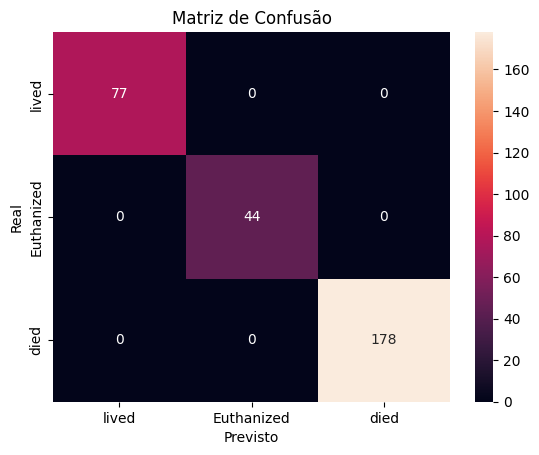

Resultados de Teste
Acurácia:  1.0
Kappa:  1.0
Weighted F1-score: 1.0


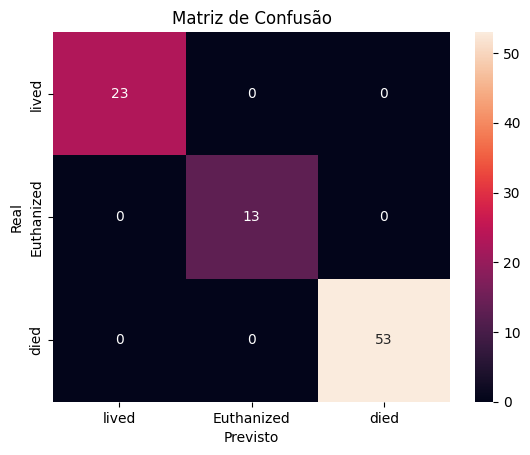

In [ ]:
model_dt_normalizacao = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model_dt_normalizacao.fit(normalized_x_horse_data, y_horse_data);
print('Resultados de Treino')
predict_and_evaluate(model_dt_normalizacao, normalized_x_horse_data, y_horse_data)
print('Resultados de Teste')
predict_and_evaluate(model_dt_normalizacao, normalized_x_horse_test, y_horse_test)

##Resultados:





| Etapas de preprocessamento | Pós Missing | Pós Normalização | | |
|----------------------------|-------------|------------------|-------------------|---------
| Acuracia                   |   1. 0            |  1.0                |                   |         |
| Kappa                      |  1.0           |    1.0              |                   |         |
| F1                         |   1.0          |     1.0             |                   |         |

### Conclusões Finais

- Os resultados mostraram que o melhor modelo para a classificação foi o Decision Treen, com uma acurácia de 1.0, um kappa de 1.0 e um F1-score de 1.0.
- As etapas de pré processamento de balanceamento e normalização são importantes mas conforme evidenciado acima após o tratamento de missings já seria possível gerar o modelo.